# Strong gravitational lensing

### interactive lecture notes with code examples

This lecture notebook provides the basic theory and equations of gravitational lensing and interactive code examples using [lenstronomy](https://github.com/sibirrer/lenstronomy).

Additional material and partial sources of this notebook:
    
- [Lecture notes by M. Meneghetti](https://www.ita.uni-heidelberg.de/~jmerten/misc/meneghetti_lensing.pdf)
- [Bartelmann & Schneider 2001; Weak gravitational lensing](https://ui.adsabs.harvard.edu/abs/2001PhR...340..291B/abstract)
- [Slides by S. Suyu for the XXIV Canary Islands Winter School of Astrophysics 2012](http://research.iac.es/winterschool/2012/media/Suyu_L2.pdf)
- [wikipedia: gravitational lensing formalism](https://en.wikipedia.org/wiki/Gravitational_lensing_formalism)

In [1]:
!pip install lenstronomy  # tested with version 1.8.2
!pip install pyyaml==5.1
!pip install corner

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import numpy.testing as npt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/local/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/local/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/local/bin/python -m pip install --upgrade pip' command.


**WARNING**: You need to reload the installation to over-write the yaml installation from the default colab one!

# Theory

In this part we go through the basic equations of gravitational lensing with an emphasis on the regime of one dominant main (strong) deflector.

## Lens equation

The lens equation describes the distortion of a coordinate in the source plane as been seen on the image plane:

$$ \boldsymbol{\eta} = \frac{D_{\rm S}}{D_{\rm d}} \boldsymbol{\zeta} - D_{\rm ds}\hat{\boldsymbol{\alpha}}(\boldsymbol{\zeta}) $$

In terms of angular coordinates $\boldsymbol{\eta} = D_{\rm s} \boldsymbol{\beta}$ and $\boldsymbol{\zeta} = D_{\rm d}\boldsymbol{\theta}$ the mapping results in

$$ \boldsymbol{\beta} = \boldsymbol{\theta} - \boldsymbol{\alpha}(\boldsymbol{\theta})$$
with
$$\boldsymbol{\alpha}(\boldsymbol{\theta}) \equiv \frac{D_{\rm ds}}{D_{\rm s}} \hat{\boldsymbol{\alpha}}(D_{\rm d}\boldsymbol{\theta}).$$


In [2]:
from IPython.display import Image
Image(url= "https://raw.githubusercontent.com/sibirrer/strong_lensing_lectures/main/Graphics/lens_equation.png", width=400, height=400)


Figure by [Bartelmann & Schneider 2001](https://ui.adsabs.harvard.edu/abs/2001PhR...340..291B/abstract).


## Deflection angle 
$\textit{(physical and reduced deflections)}$

Fom General Relativity, a point mass deflects a light ray passing at an impact parameter $\xi$ by a deflection

$$\hat{\boldsymbol{\alpha}} = \frac{4GM}{c^2 \xi}. $$

In the weak gravitational regime with small deflection angles, a light ray travelling through a path described as $(\xi'_1, \xi'_2, z')$ with density $\rho$ will get phyiscally deflected by

$$ \hat{\boldsymbol{\alpha}}(\boldsymbol{\xi}) = \frac{4G}{c^2} \int {\rm d^2}\boldsymbol{\xi'} \int {\rm d}z' \rho(\xi'_1, \xi'_2, z') \frac{\boldsymbol{\xi} - \boldsymbol{\xi'}}{\left| \boldsymbol{\xi} - \boldsymbol{\xi'} \right|^2}. $$

In this regime, we can write the lensing quantities as a function of the projected surface mass density $\Sigma(\boldsymbol{\xi})$

$$ \Sigma(\boldsymbol{\xi}) = \int {\rm d}z' \rho(\xi'_1, \xi'_2, z') $$

and with (from box above)
$$\boldsymbol{\alpha}(\boldsymbol{\theta}) \equiv \frac{D_{\rm ds}}{D_{\rm s}} \hat{\boldsymbol{\alpha}}(D_{\rm d}\boldsymbol{\theta}). $$ 

We can write the observed deflection angle $\boldsymbol{\alpha}$ as

$$ \boldsymbol{\alpha}(\boldsymbol{\theta}) = \frac{1}{\pi} \int_{\mathbb{R}^2} {\rm d^2}\boldsymbol{\theta'} \kappa(\boldsymbol{\theta'}) \frac{\boldsymbol{\theta} - \boldsymbol{\theta'}}{\left| \boldsymbol{\theta} - \boldsymbol{\theta'} \right|^2},$$

where $\kappa$ is the dimensionless lensing surface mass density with

$$\kappa(\boldsymbol{\theta}) = \frac{\Sigma(D_{\rm d}\boldsymbol{\theta})}{\Sigma_{\rm crit}}$$

and

$$ \Sigma_{\rm crit} = \frac{c^2}{4\pi G} \frac{D_{\rm s}}{D_{\rm d}D_{\rm ds}}.$$



In [3]:
# lenstronomy computation of deflection angles as seen on the sky - short example

from lenstronomy.LensModel.lens_model import LensModel
lens_model_sis = LensModel(lens_model_list=['SIS'])  # Lens Model instance with a singular isothermal sphere
kwargs_sis = [{'theta_E': 1, 'center_x': 0, 'center_y': 0}]
theta_x, theta_y = 1, 0.2  # angular coordinates where to evaluate the defleciton angle
alpha_x, alpha_y = lens_model_sis.alpha(theta_x, theta_y, kwargs_sis)  # evaluation of the deflection angles in both directions

# we can also ray-trace, meaning calculating the source position beta given the image position and a deflection field
beta_x, beta_y = lens_model_sis.ray_shooting(theta_x, theta_y, kwargs_sis)

# by definition, image position, deflection angle and source positions are related by the lens equation
import numpy.testing as npt
npt.assert_almost_equal(theta_x - alpha_x, beta_x, decimal=10)
npt.assert_almost_equal(theta_y - alpha_y, beta_y, decimal=10)


## Lensing potential


In the single lens plane regime we can introduce the lensing potential $\psi$ such that the reduced deflection angle is the gradient of the potential

$$
    \boldsymbol{\alpha}(\boldsymbol{\theta}) = \nabla \psi(\boldsymbol{\theta})
$$
and the lensing convergence is
$$
    \kappa(\boldsymbol{\theta}) =  \frac{1}{2}\nabla^2 \psi(\boldsymbol{\theta}).
$$

Using

$$ \nabla \ln(\boldsymbol{\theta}) = \frac{\boldsymbol{\theta}}{\left|\boldsymbol{\theta}^2\right|}$$

we can write

$$ \psi(\boldsymbol{\theta}) = \int_{\mathbb{R}^2} {\rm d^2}\boldsymbol{\theta'} \kappa(\boldsymbol{\theta'}) \ln(\boldsymbol{\theta} - \boldsymbol{\theta'}).
$$




In [4]:
# lenstronomy computation of lensing example for the same lens model (units in arc seconds square)
psi = lens_model_sis.potential(theta_x, theta_y, kwargs_sis)  # evaluation the lensing potential


## Fermat potential

We can define a scalar function, known as the Fermat potential:
$$ \tau(\boldsymbol{\theta}, \boldsymbol{\beta}) \equiv  \frac{1}{2}\left(\boldsymbol{\theta} - \boldsymbol{\beta} \right)^2 - \psi(\boldsymbol{\theta})$$.

The extrema of this function

$$ \nabla_{\tau}(\boldsymbol{\theta}, \boldsymbol{\beta}) = 0$$

satisfy the lens equation

$$ \boldsymbol{\beta} = \boldsymbol{\theta} - \boldsymbol{\alpha}(\boldsymbol{\theta})$$.




## Fermat's principle

The Fermat potential is proportional to an excess time delay $\Delta t$ of the path relative to a straight unlensed path.


Fermat's principle states: Rays of light traverse the path of stationary optical length with respect to variations of the path, i.e.
$$ \nabla t = \nabla \tau = 0  $$

The first term of the Fermat potential is the geometric time delay $\frac{1}{2}\left(\boldsymbol{\theta} - \boldsymbol{\beta} \right)^2$, the second term is the Shapiro delay $\psi(\boldsymbol{\theta})$.

Relation to Huygen's construction: Wave optics requires that parallel wavefronts remain parallel. The potential depth acts as a diffractive index and the solution is the lens equation with the associated deflection angles.





In [5]:
# lenstronomy computation of Fermat potential for the same lens model (units in arc seconds square)
psi = lens_model_sis.fermat_potential(theta_x, theta_y, kwargs_sis)  # evaluation the Fermat potential

## Time delays

The time delay relative to an unlensed path is given by

$$ t(\boldsymbol{\theta}, \boldsymbol{\beta}) = \frac{1 + z_{\rm d}}{c}\frac{D_{\rm d}D_{\rm s}}{D_{\rm ds}} \tau(\boldsymbol{\theta}, \boldsymbol{\beta}),$$

where $c$ is the speed of light, $z_{\rm d}$ is the deflector redshift, $\tau$ the Fermat potential and $D_{\rm d}$, $D_{\rm s}$ and $D_{\rm ds}$ are the angular diameter distances from the observer to the lens, from the observer to the source, and from the deflector to the source, respectively.

$\tau$ is a geometrical quantity (units of radians or arc seconds) solely defined by the optical quantities imprinted in the relative mapping from the source to the image plan (lens equation), while the quantity 

$$D_{\Delta t} \equiv \left(1+ z_{\rm d} \right) \frac{D_{\rm d}D_{\rm s}}{D_{\rm ds}} $$
is known as the time-delay distance and imprints the cosmology-dependent absolute distances.



In [6]:
# lenstronomy computation of time delays
# for this quantity, we require knowledge of the angular diameter distances, and thus a cosmology as well as the redshift of the deflector and source.
# We are using the astropy cosmology library to define and calculate the cosmological distances

# create astropy.cosmology instance of input cosmology
from astropy.cosmology import FlatLambdaCDM
# Flat LCDM cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

z_lens = 0.3
z_source = 1.5

lens_model_sis = LensModel(lens_model_list=['SIS'], z_lens=z_lens, z_source=z_source, cosmo=cosmo)  # Lens Model instance with a singular isothermal sphere, redshifts and cosmology
dt = lens_model_sis.arrival_time(theta_x, theta_y, kwargs_sis)  # evaluation arrival time relative to a straight unlensed path (in units of days)

print('Time delay is %s days relative to unlensed path.' % dt)  # negative sign means that the arrival time is BEFORE the unlensed ray

Time delay is -23.93532283834491 days relative to unlensed path.


## Distortions and magnification

The change in the deflection field results in distortions in extended images and magnification effects in unresolved small sources.

We can define the lensing Jacobian $\mathbf{A}$ as the differential of the lens equation

$$ A_{ij} \equiv {\frac {\partial \beta _{i}}{\partial \theta _{j}}}=\delta _{ij}-{\frac {\partial \alpha _{i}}{\partial \theta _{j}}}=\delta _{ij}-{\frac {\partial ^{2}\psi }{\partial \theta _{i}\partial \theta _{j}}}
=\left[{\begin{array}{c c }1-\kappa -\gamma _{1}&\gamma _{2}\\\gamma _{2}&1-\kappa +\gamma _{1}\end{array}}\right]
$$

where $\delta_{ij}$ is the Kronecker delta and we have define the derivatives
$$
\kappa \equiv{\partial \psi  \over 2\partial \theta _{1}\partial \theta _{1}}+{\partial \psi  \over 2\partial \theta _{2}\partial \theta _{2}},~\gamma _{1}\equiv {\partial \psi  \over 2\partial \theta _{1}\partial \theta _{1}}-{\partial \psi  \over 2\partial \theta _{2}\partial \theta _{2}},~\gamma _{2}\equiv {\partial \psi  \over \partial \theta _{1}\partial \theta _{2}}.
$$

We see that in this way, convergence is a property of a vector field rather a physical quantity. It happens that this vector field quantity corresponds to scales surface mass density (for a single plane deflector).

The determinant of the Jacobian $\mathbf{A}$ defines the mapping of an infinitesimal area element from the  image plane to the source plane. Lensing perserves surface brightness. It is the differential change in area that causes different amplifications due to lensing (i.e. the surface brightness of a star has always the same brightness and temperature, but the observed angular size of the star can change by lensing).

The lensing amplification (or magnification) $\mu$, the ratio of lensed observed flux divided by the intrinsic unlensed flux is given by the inverse determinant of the Jacobian

$$ \mu \equiv \frac{F_{\rm lensed}}{F_{\rm unlensed}} = 1/\det(A_{ij})={1 \over (1-\kappa )^{2}-\gamma _{1}^{2}-\gamma _{2}^{2}}.
$$

The determinant has a sign (can be positive or negative). A negative sign means that the infinitesimal image is mirrored (changed parity) in respect to the unlensed source.

In [7]:
# lenstronomy commands to calculate distortion components

psi_xx, psi_xy, psi_yx, psi_yy = lens_model_sis.hessian(theta_x, theta_y, kwargs_sis)  # Hessian; second derivative of the potential
kappa = lens_model_sis.kappa(theta_x, theta_y, kwargs_sis)  # convergence
gamma1, gamma2 = lens_model_sis.gamma(theta_x, theta_y, kwargs_sis)  # shear
mu = lens_model_sis.magnification(theta_x, theta_y, kwargs_sis)  # magnification

# and here we check whether the definitions are correct
npt.assert_almost_equal(kappa, 1/2. * (psi_xx + psi_yy), decimal=10)
npt.assert_almost_equal(gamma1, 1/2. * (psi_xx - psi_yy), decimal=10)
npt.assert_almost_equal(gamma2, psi_xy, decimal=10)
npt.assert_almost_equal(mu, 1 / ((1-kappa)**2 - gamma1**2 - gamma2**2), decimal=10)


## illustration of lensing effect

In the next block we are setting up a singular isothermal ellipse (SIE) model with a constant external shear field and illustrate the lensing quantities we have introduced above.

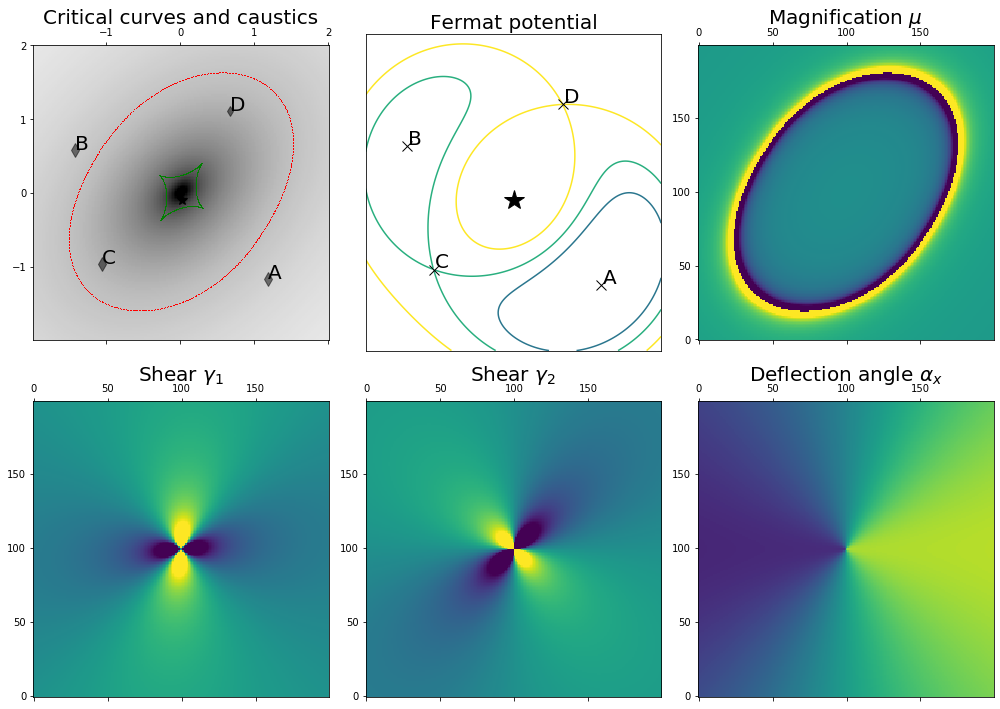

In [8]:
# illustration of lensing quantities
from lenstronomy.Plots.lens_plot import lens_model_plot, arrival_time_surface
from lenstronomy.Util import util

lens_model_sie_shear = LensModel(lens_model_list=['SIE', 'SHEAR'], z_lens=z_lens, z_source=z_source, cosmo=cosmo)

kwargs_lens_sie_shear = [{'theta_E': 1.5, 'e1': 0, 'e2': 0.2, 'center_x': 0, 'center_y': 0},  # SIE model parameters
                         {'gamma1': 0.04, 'gamma2': 0}  # Shear model parameters
                        ]

source_x, source_y = 0.01, -0.1  # source position




# coordinate grid for plotting
num_pix = 200
delta_pix = 0.02

x_grid, y_grid = util.make_grid(numPix=num_pix, deltapix=delta_pix)

kwargs_lens_plot = {'with_caustics': True, 'fast_caustic': True, 'point_source': True,
                   'with_convergence': True, 'numPix': num_pix, 'deltaPix': delta_pix}

f, axex = plt.subplots(2, 3, figsize=(14, 10))



# image positions, critical curves and caustics
lens_model_plot(axex[0, 0], lens_model_sie_shear, kwargs_lens_sie_shear, 
                          sourcePos_x=source_x, 
                          sourcePos_y=source_y, **kwargs_lens_plot)
axex[0, 0].set_title('Critical curves and caustics', fontsize=20)

arrival_time_surface(axex[0, 1], lens_model_sie_shear, kwargs_lens_sie_shear, sourcePos_x=source_x, 
                     sourcePos_y=source_y, numPix=num_pix, deltaPix=delta_pix, point_source=True)
axex[0, 1].set_title('Fermat potential', fontsize=20)

mu = lens_model_sie_shear.magnification(x_grid, y_grid, kwargs_lens_sie_shear)
mu = util.array2image(mu)

axex[0, 2].matshow(mu, origin='lower', vmin=-20, vmax=20)
axex[0, 2].set_title(r'Magnification $\mu$', fontsize=20)

gamma1, gamma2 = lens_model_sie_shear.gamma(x_grid, y_grid, kwargs_lens_sie_shear)

axex[1, 0].matshow(util.array2image(gamma1), origin='lower', vmin=-2, vmax=2)
axex[1, 0].set_title(r'Shear $\gamma_1$', fontsize=20)

axex[1, 1].matshow(util.array2image(gamma2), origin='lower', vmin=-2, vmax=2)
axex[1, 1].set_title(r'Shear $\gamma_2$', fontsize=20)


alpha_x, alpha_y = lens_model_sie_shear.alpha(x_grid, y_grid, kwargs_lens_sie_shear)
axex[1, 2].matshow(util.array2image(alpha_x), origin='lower', vmin=-2, vmax=2)
axex[1, 2].set_title(r'Deflection angle $\alpha_x$', fontsize=20)

plt.tight_layout()
plt.show()


## Critical curves and caustics

The curve with $\det(A) = 0$ in the image plane is called the critical curve. This is a curve with formally infinite magnification (for any finite source, this is physically still resulting in finite magnification and overall photon number conservation). The corresponding ray-traced coordinates in the source plane $\beta$ are called the caustic curves.

Critical curves and caustics are a practically usefull concept to describe the structure of a lens.

## Image configurations

Specific configurations of quadruply imaged point-like sources have been given names. The image configurations depend on the position within the caustic. Here we provide some examples.

/Users/sibirrer/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


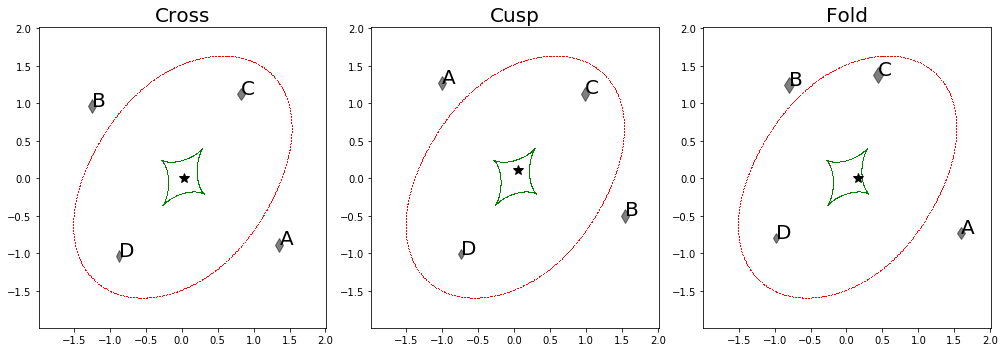

In [9]:
# ===========================================================
# defining a lens model (Singular Isothermal Ellipse + Shear)
# ===========================================================

from lenstronomy.LensModel.lens_model import LensModel

lens_model = LensModel(lens_model_list=['SIE', 'SHEAR'])

kwargs_lens = [{'theta_E': 1.5, 'e1': 0, 'e2': 0.2, 'center_x': 0, 'center_y': 0},
               {'gamma1': 0.04, 'gamma2': 0}]




# ========================================================================
# defining soure positions to lead to cusp, fold, and cross configurations
# ========================================================================

kwargs_ps_cross = [{'ra_source': 0.02, 'dec_source': 0}]  # cross
kwargs_ps_fold = [{'ra_source': 0.15, 'dec_source': 0}]  # cusp
kwargs_ps_cusp = [{'ra_source': 0.05, 'dec_source': 0.1}]  # fold


# =========================================
# illustrate image configurations in figure
# =========================================

from lenstronomy.Plots.lens_plot import lens_model_plot, arrival_time_surface


kwargs_lens_plot = {'with_caustics': True, 'fast_caustic': True, 'point_source': True,
                   'with_convergence': False, 'numPix': 200, 'deltaPix': 0.02}

f, axex = plt.subplots(1, 3, figsize=(14, 5))
# cross
lens_model_plot(axex[0], lens_model, kwargs_lens, 
                          sourcePos_x=kwargs_ps_cross[0]['ra_source'], 
                          sourcePos_y=kwargs_ps_cross[0]['dec_source'], **kwargs_lens_plot)
axex[0].set_title('Cross', fontsize=20)

# cusp
lens_model_plot(axex[1], lens_model, kwargs_lens,
                          sourcePos_x=kwargs_ps_cusp[0]['ra_source'], 
                          sourcePos_y=kwargs_ps_cusp[0]['dec_source'], **kwargs_lens_plot)
axex[1].set_title('Cusp', fontsize=20)

# fold
lens_model_plot(axex[2], lens_model, kwargs_lens,
                          sourcePos_x=kwargs_ps_fold[0]['ra_source'], 
                          sourcePos_y=kwargs_ps_fold[0]['dec_source'], **kwargs_lens_plot)
axex[2].set_title('Fold', fontsize=20)
f.tight_layout()
f.show()


